In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [2]:
theta1 = 0.005
theta = str(theta1)
N21 = 9.9e-6
N2 = "9.9e-6"
Vinf1 = 0.05
Vinf = str(Vinf1)
h = str(104.0)
fstar = (1e-8+theta1**2*N21)**(0.5)
delta = 0.1
bo = 0

In [3]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
# file = "flow_fields_height_101.0_theta_0.005_stratification_1.0e-5_interior_velocity_0.05_delta_0.1_bo_0.nc" #f"dataflow_fields_height_{h}_theta_{theta}_stratification_{N2}_interior_velocity_{Vinf}.nc"
# file = f"flow_fields_height_{h}_theta_{theta}_stratification_{N2}_interior_velocity_{Vinf}_delta_0.1_bo_0.nc"
# file = "flow_fields_height_103.125_theta_0.005_stratification_1.0e-5_interior_velocity_0.05_delta_0.1_bo_0_visc_0_boundary_fix9.nc"
file = "olddata/dataflow_fields_height_103.0_theta_0.005_stratification_1.0e-5_interior_velocity_0.05.nc"
ocean_data=xr.open_dataset("/glade/derecho/scratch/knudsenl/data/"+file)#.isel(time=slice(0,4000)) #i=103
seconds = ocean_data.time/pd.Timedelta("1s")
ocean_data = ocean_data.assign_coords(time = ('time',seconds.data))

In [52]:
h1 = (1e-4*0.05)/(1e-5*5*1e-3*(1+1e-5*(5*1e-3)**2*1e8)**(-1))
h1

102.49999999999999

In [4]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
# ocean_data=xr.open_dataset("/glade/derecho/scratch/knudsenl/data/dataflow_fields_height_123.0_theta_0.005_stratification_1.0e-5_interior_velocity_0.06.nc") #i=103
# ocean_data=xr.open_dataset("../BBL_w_O_updated_diagnostics_extra_flow_terms.nc") #i=103

# ocean_data2=xr.open_dataset("../BBL_w_O_updated_diagnostics_TKE_terms.nc") #i=103

In [5]:
# ocean_data

In [6]:
# print((1/pd.Timedelta("1s"))*ocean_data.time[-1]*(1e-8+0*1e-4*1e-5)**(0.5)/(2*np.pi))
# print(ocean_data2.time[-1]/pd.Timedelta("1s")*(1e-8+0*1e-4*1e-5)**(0.5)/(2*np.pi))

In [7]:
# Vi = 0.1
# N2 = 1E-5
# theta = 1E-2
# f = 1E-4
# s2 = N2*theta**2/f**2
# gamma = (1+s2)**(-1) 
# h = (f*Vi)/(gamma*N2*theta)
# ocean_data = ocean_data.sel(zC=slice(0,h),zF=slice(0,h))

In [8]:
ua = ocean_data.ua
u = ocean_data.u.interp_like(ocean_data.ua.xF)
ub = ocean_data.ub

In [9]:
una = np.add(ua.values,ub.values)
ut = np.add(unb,u.values)
una = xr.DataArray(una,coords= {'time':ocean_data.time,'zC':ocean_data.zC,'yC':ocean_data.yC,'xF':ocean_data.xF})
ut = xr.DataArray(ut,coords= {'time':ocean_data.time,'zC':ocean_data.zC,'yC':ocean_data.yC,'xF':ocean_data.xF})

NameError: name 'unb' is not defined

In [ ]:
va = ocean_data.va
v = ocean_data.v
vb = ocean_data.vb.interp_like(ocean_data.va.xC)

In [ ]:
ocean_data.vb

In [ ]:
vna = np.add(va.values,vb.values)
vt = np.add(vnb,v.values)
vna = xr.DataArray(vna,coords= {'time':ocean_data.time,'zC':ocean_data.zC,'yC':ocean_data.yC,'xC':ocean_data.xC})
vt = xr.DataArray(vt,coords= {'time':ocean_data.time,'zC':ocean_data.zC,'yC':ocean_data.yC,'xC':ocean_data.xC})

In [ ]:
bna = ocean_data.ba +ocean_data.B
bt = bna+ ocean_data.b

In [ ]:
# vtz = vt.differentiate("zC")
# # vtx = vt.differentiate("xC")
# vnbz = ocean_data.vb.differentiate("zC")
# vnbx = ocean_data.vb.differentiate("xF")
# vnax = ocean_data.vb.differentiate("xF")
# btz = bt.differentiate("zC")
bnaz = ocean_data.ba.differentiate("zC")
# bnax = ocean_data.B.differentiate("zC")*5*10**(-3)*(-1)

In [ ]:
bnaz.isel(time=-1).plot(cbar_kwargs={'label': "Stratification Anomaly"})

In [ ]:
PVt = (1e-4-theta1*vtzm)*btzm-vtzm*(-theta1*btzm)
PVt

In [ ]:
(1e-5*theta1*gamma)/1e-4-(1e-5*theta1*gamma)/1e-4*0.1

In [ ]:
ocean_data.b

In [ ]:
ocean_data.v.isel(time=300,zC = slice(0,50)).plot()

In [ ]:
ocean_data.b.isel(time=300,zC = slice(0,50)).plot()

In [ ]:
gamma = (1+(5e-3)**2*1e-5/1e-8)**(-1)
PVna2 = (1e-4)*(bnazm)-(vnazm)*(bnaxm)
PVna2

In [ ]:
gamma = (1+(5e-3)**2*1e-5/1e-8)**(-1)
PVna = (1e-4+vnaxm-theta1*vnazm)*(bnazm+theta1*bnazm)-(vnazm+theta1*vnaxm)*(bnazm-theta1*bnazm)
PVna

In [ ]:

# vt = np.add(ocean_data.vb.values,ocean_data.va.values)
# vt = xr.DataArray(vt,coords= {'time':ocean_data.time,'zC':ocean_data.zC,'yC':ocean_data.yC,'xC':ocean_data.xC})

In [ ]:
# vt

In [ ]:
# f = 2*(7.292115e-5)*np.sin(np.pi/4)
v.time[19]*(fstar/(2*np.pi))

In [ ]:
s = (ocean_data.u**2+ocean_data.v**2+ocean_data.w**2)**(0.5)

In [ ]:
ocean_data

In [ ]:
PVm = (ocean_data.PV)
gamma = (1+(5e-3)**2*0.99e-5/1e-8)**(-1)

In [ ]:
((PVm.isel(yF=0,xF=256,zF=30)*(1e-4)/(0.99e-5*(1-gamma)))**(0.5)).plot()
plt.show()

In [ ]:
1e-4*(0.1)**(0.5)

In [ ]:
(1e-8*())

In [ ]:
gamma = (1+((5e-3)**2*0.99e-5)/1e-8)**(-1)
pvmn = (((ocean_data.PV.isel(zF=slice(0,25)))*(1e-4/(0.99e-5*(1-gamma))))**(0.5)) # 
pvmn

In [ ]:
(1e-8+(5e-3)**2*0.99e-5)**(0.5)/2

In [ ]:
pvmn.plot()
plt.show()

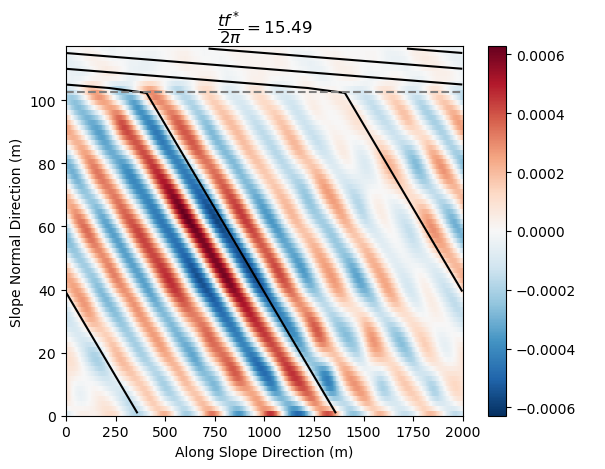

In [71]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = 306
tm = str(round(ocean_data.time[q].values*fstar/(2*np.pi),2))
ocean_data.v.isel(time=q,zC=slice(0,75)).plot(cbar_kwargs={'label': " "}) # cmap="Accent"zC=slice(0,70)
ocean_data.B.isel(time=q,yC=0,zC=slice(0,75)).plot.contour(colors="k")
# xr.plot.contour(bt.isel(time=q,yC=0,zC=slice(0,66)),x=bt.dims[3],y=bt.dims[1],levels=10)#.plot.contour(cmap="ocean",levels= 10)
plt.title(r"$\dfrac{tf^*}{2\pi}=$"+str(tm))
plt.xlabel("Along Slope Direction (m)")
plt.ylabel("Slope Normal Direction (m)")
plt.hlines(h1,xmin=0,xmax=2000,linestyles="--",color="grey")
# xr.plot.contour(b[q,:,:,0],levels=20,cmap="gray")
# # plt.title("Small Pertubations w/0 Background")
plt.savefig("vvelocity_"+tm+".png")
plt.show()

In [ ]:
ocean_data.PV

In [ ]:
ocean_data.PV.cumulative_integrate("xF")

In [ ]:
b[0,:,0,:].dims

In [ ]:
# plt.contour(b[0])
b[0,:,0,:].mean(dim='xC').plot()#.plot.contour()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(ocean_data.u.time[0:500])
def animate(t):
    plt.clf()
    tm = round(ocean_data.time[t].data*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),2)
    # norm = matplotlib.colors.SymLogNorm(linthresh=0.000001,linscale=1,base=10,vmin=ocean_data.v.min(),vmax=10**(-4))
    ocean_data.v[t].plot(add_colorbar=True,cmap='seismic',norm = matplotlib.colors.SymLogNorm(linthresh=0.00005,linscale=1,base=10,vmin=-10**(-1),vmax=10**(-1)),cbar_kwargs={'label': "perturbation v-velocity (m/s)"}) # vmin=-0.001,vmax=0.001
    plt.xlabel("Along Slope Direction (m)")
    plt.ylabel("Slope Normal Direction (m)")
    # ocean_data.v[t].plot(add_colorbar=True,cmap='bwr',vmin=0,vmax=1e-9) # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # bt[t,:,0,:].plot.contour(cmap="ocean",levels= 10)
    plt.title("$v$-velocity at $t\dfrac{f^*}{2\pi}=$"+str(tm))

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('v_base_PSI.gif') 
plt.close()

In [ ]:
tm = np.round(ocean_data.time.data*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),2)


In [ ]:
tm[500]

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(ocean_data.u.time)
def animate(t):
    plt.clf()
    tm = round(ocean_data.time[t].data*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),2)
    ocean_data.PV[t].plot(add_colorbar=True,cmap='bwr',norm = matplotlib.colors.SymLogNorm(linthresh=0.000001,linscale=1,base=10,vmin=-0.05,vmax=0.05)) # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)
    plt.title("$v$-velocity at $t\dfrac{f^*}{2\pi}=$"+str(tm))

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('u_base_PSI.gif') 
# plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.B[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=240) 
anim.save('v_total_PSI_base.gif',fps=240) 
plt.close()

In [ ]:
t = 367
tm = ocean_data.time[t]/pd.Timedelta("1s")*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi)
tm.data

In [ ]:
t = 401 # 191 295
tm = round(ocean_data.time[t].data*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),2)
fig, axs = plt.subplots()
ocean_data.V[t].plot(add_colorbar=True,vmin=-0.1,vmax=0.1,cmap='bwr',cbar_kwargs={'label': "Across slope velocity ($v\,[m/s]$)"}) # vmin=-0.001,vmax=0.001
# plt.contour(b[t,:,0,:],cmap="Greys")
b[t,:,0,:].plot.contour(cmap="black",levels= 10)
plt.title("$v$-velocity at $t\dfrac{f^*}{2\pi}=$"+str(tm))
plt.xlabel("Distance along-slope ($y\,[m]$)")
plt.ylabel("Height above slope ($z\,[m]$)")
# plt.savefig("vtotalplot20_5.pdf")
plt.show()
tm

In [ ]:
t = 419 # 201 307
tm = round(ocean_data.time[t].data/pd.Timedelta("1s")*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),2)
fig, axs = plt.subplots()
ocean_data.[t].plot(add_colorbar=True,vmin=-0.01,vmax=0.01,cmap='bwr',cbar_kwargs={'label': "Across slope velocity($v[m/s]$)"}) # vmin=-0.001,vmax=0.001
# plt.contour(b[t,:,0,:],cmap="Greys")
b[t,:,0,:].plot.contour(cmap="black",levels= 10)
plt.title("$v$-velocity at $t\dfrac{f^*}{2\pi}=$"+str(tm))
plt.xlabel("Distance along-slope($y[m]$)")
plt.ylabel("Height above slope($z[m]$)")
plt.show()
tm

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(w.time)
def animate(t):
    plt.clf()
    ocean_data.w[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=240) 
anim.save('w_PSI_base.gif',fps=240) 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.PV[t].plot(add_colorbar=True,vmin=-1e-9,vmax=1e-9,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('PV_PSI_base_bwr.gif') 
plt.close()

In [ ]:
ocean_data_2=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/BBL_w_O_updated_diagnostics_TKE_terms.nc") #i=103

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(ocean_data_2.KE.time)
def animate(t):
    plt.clf()
    ocean_data_2.KE[t].plot(add_colorbar=True,norm=matplotlib.colors.LogNorm(vmin=10**(-8),vmax=10**(-3)),cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t*10,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('KE_plot.gif',fps=480) 
plt.close()

In [ ]:
KE_spatial_average_time_series = ocean_data.KE.mean(dim=['xC','yC','zC'])
KE_spatial_average_time_series

In [ ]:
inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
KE_spatial_average_time_series_ip = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [ ]:
inertial_period[2061]

In [ ]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values)
plt.show()

In [ ]:
timeKE = KE_spatial_average_time_series.time
timeKE*1e-9

In [ ]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values[518])
plt.title("Pertubation kinetic energy over time")
plt.ylabel('$k$/$k_5$')
plt.xlabel('$t$')
plt.yscale('log')
plt.show()

In [ ]:
ts = 518
tf = 2061
plt.plot(KE_spatial_average_time_series_ip.intp[ts:tf],KE_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t\dfrac{2\pi}{f}$')
plt.yscale('log')
plt.show()

In [ ]:
ocean_data

In [ ]:
AGSP_spatial_average_time_series = ocean_data.AGSP.mean(dim=['xF','yC','zC'])
inertial_period = AGSP_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


In [ ]:
plt.plot(AGSP_spatial_average_time_series_ip.intp[100:140],AGSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [ ]:
GSP_spatial_average_time_series = ocean_data.GSP.mean(dim=['xC','yF','zC'])
inertial_period = GSP_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


In [ ]:
plt.plot(GSP_spatial_average_time_series_ip.intp[100:140],GSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [ ]:
BFLUX_spatial_average_time_series = ocean_data.BFLUX.mean(dim=['xC','yC','zF'])
inertial_period = BFLUX_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


In [ ]:
plt.plot(BFLUX_spatial_average_time_series_ip.intp[100:140],BFLUX_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [ ]:
E_spatial_average_time_series = ocean_data.E.mean(dim=['xC','yC','zC'])
inertial_period = E_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
E_spatial_average_time_series_ip = E_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


In [ ]:
plt.plot(E_spatial_average_time_series_ip.intp[100:140],-1*E_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [ ]:
PWORK_spatial_average_time_series = ocean_data.PWORK.mean(dim=['xC','yC','zC'])
inertial_period = PWORK_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [ ]:
plt.plot(PWORK_spatial_average_time_series_ip.intp[100:140],PWORK_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [ ]:
ts = 120
tf = 2061
seconds = KE_spatial_average_time_series.time/pd.Timedelta("1s")
inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
KE_spatial_average_time_series_s= KE_spatial_average_time_series.assign_coords(sec = ('time',seconds.data))
dkdt = KE_spatial_average_time_series_s.differentiate(coord='sec',edge_order=2)
# np.gradient(KE_spatial_average_time_series_ip,KE_spatial_average_time_series_ip.time)
plt.plot(inertial_period[100:140],dkdt[100:140]/KE_spatial_average_time_series_s[100:140])


In [ ]:
inertial_period[1244]

In [ ]:
ts = 1037
tf = 1244
plt.plot(inertial_period[ts:tf],dkdt[ts:tf]/KE_spatial_average_time_series_s[ts:tf]*1e4,color="k",label='$\dfrac{1}{k}\dfrac{\partial k}{\partial t}$')
plt.plot(AGSP_spatial_average_time_series_ip.intp[ts:tf],AGSP_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf]*1e4,color='red',label='AGSP/k')
plt.plot(GSP_spatial_average_time_series_ip.intp[ts:tf],GSP_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf]*1e4,color='green',label='GSP/k')
plt.plot(BFLUX_spatial_average_time_series_ip.intp[ts:tf],BFLUX_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf]*1e4,color='blue',label='BFLUX/k')
plt.plot(E_spatial_average_time_series_ip.intp[ts:tf],-1*E_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf]*1e4,color='pink',label='$-\epsilon/k$')
# plt.plot(PWORK_spatial_average_time_series_ip.intp[ts:tf],PWORK_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='orange')
plt.axhline(color="violet")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("TKE growth rate/f")
plt.legend(loc='lower left')
plt.figure(figsize=(12,5))
plt.show()

In [ ]:
tm = ocean_data.time*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi)
tm[359]

In [ ]:
ts = 295
tf = 398
tm = ocean_data.time*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi)
plt.plot(tm[ts:tf],ocean_data.u[ts:tf,20,0,250]/ocean_data.v[96,20,0,250],color="blue",label="$\dfrac{u'}{v_5}$")
plt.plot(tm[ts:tf],ocean_data.v[ts:tf,20,0,250]/ocean_data.v[96,20,0,250],color="red",linestyle='dashed',label="$\dfrac{v'}{v_5}$")
# plt.plot(ocean_data.time[490:]*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),ocean_data.U[490:,20,0,250]/ocean_data.V[490,20,0,250],color="red")
# plt.ylabel("$u/v_5$")
plt.xlabel("$t\,\dfrac{f^*}{2\pi}$")
plt.legend()
plt.show()

In [ ]:
times = (tm[96].values*np.ones(7)+np.linspace(0,12,7))#*2*np.pi/(1e-8+1e-4*1e-5)**(0.5)
times

In [ ]:
np.linspace(0,8,5)

In [ ]:
# normalized the data
ts = 96
# ocean_data2 = ocean_data.to_dataframe
times = 2*np.pi/(1e-8+1e-4*1e-5)**(0.5)*tm[96].values*np.ones(7)+2*np.pi/(1e-8+1e-4*1e-5)**(0.5)*np.linspace(0,12,7)
times = times.astype("str")
value = ((ocean_data["u"]/ocean_data.v[ts+1,20,0,250]).drop_duplicates(dim="time")).sel(time=times,xF="250", yC="0",zC="20", method="nearest")

In [ ]:
value.values

In [ ]:
dlnxdt = np.diff(np.log(np.abs(value.values)))
dt =np.diff(value.time)
r = np.mean(dlnxdt/dt)
print(r)
ocean_data_norm = (ocean_data/ocean_data.v[ts+1,20,0,250]).u.sel(xF="250", yC="0",zC="20",method="nearest")/np.exp(r*ocean_data.time)
plt.plot(ocean_data_norm.time[96:360]*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),ocean_data_norm[96:360])

In [ ]:
ts = 96
tf = 245
tm = ocean_data.time*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi)
# plt.plot(tm[ts:tf],ocean_data.u[ts:tf,20,0,250]/ocean_data.v[ts,20,0,250],color="blue",label="$\dfrac{u'}{v_5}$")
mean = ocean_data.u[ts:tf,20,0,250].rolling(time=3, center=True).mean().dropna("time")
# plt.plot(tm[ts+1:tf-1],mean[:]/ocean_data.v[ts,20,0,250],color="red",linestyle='dashed',label="$\dfrac{v'}{v_5}$")
plt.plot(tm[ts+1:tf-1],(ocean_data.u[ts+1:tf-1,20,0,250]-mean[:])/ocean_data.v[ts+1,20,0,250],color="red",linestyle='dashed',label="$\dfrac{v'}{v_5}$")
# plt.plot(ocean_data.time[490:]*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),ocean_data.U[490:,20,0,250]/ocean_data.V[490,20,0,250],color="red")
# plt.ylabel("$u/v_5$")
plt.xlabel("$t\,\dfrac{f^*}{2\pi}$")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import scipy as sc

In [ ]:
# round(x[-1].values)

In [ ]:
x = ocean_data_norm.time.drop_duplicates(dim="time")
y = ocean_data_norm.drop_duplicates(dim="time")

cs = sc.interpolate.CubicSpline(x,y)
t = np.arange(96**(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi),x[-1],3000)
plt.plot(t[96:360],cs(t[96:360]))
plt.plot(ocean_data_norm.time[96:360],ocean_data_norm[96:360])


In [ ]:
FFT = np.fft.fft(cs(t[96:360]),axis=-1)
# time = ocean_data.time/pd.Timedelta("1s")
FREQ = np.fft.fftfreq(t[96:360].shape[-1])

In [ ]:
y1 = np.arange(-5,5,0.1)#ocean_data.time.shape
x1 = np.ones(len(y1))
print(fstar)

In [ ]:
plt.plot(FREQ,FFT.real)
fstar = (1e-8+1e-4*1e-5)**(0.5)/2
plt.plot(1e3*fstar*x1,y1,color="r")
plt.show()

In [ ]:
plt.plot(ocean_data.time[9:]*(1e-4)/(2*np.pi),ocean_data.v[9:,20,0,250]/ocean_data.v[9,20,0,250])
plt.plot(ocean_data.time[9:]*(1e-4)/(2*np.pi),ocean_data.V[9:,20,0,250]/ocean_data.V[9,20,0,250])
plt.ylabel("$u/v_1$,$U/V_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.time[10:]*(1e-4)/(2*np.pi),ocean_data.U[10:,20,0,250]/ocean_data.V[10,20,0,250])
plt.ylabel("$U/U_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.time[10:]*(1e-4)/(2*np.pi),ocean_data.V[10:,20,0,250]/ocean_data.V[10,20,0,250])
plt.ylabel("$V/V_1$")
plt.show()

In [ ]:
ts = 518
tf = 2061
plt.plot(ocean_data.U[ts:tf,20,0,250],ocean_data.V[ts:tf,20,0,250])
plt.title("Total velocity hodograph over linear instability period")
plt.xlabel("$u_T$")
plt.ylabel("$v_T$")
plt.gca().set_aspect("equal")
plt.show()

In [ ]:
time = ocean_data.time[10:]*1e-9
plt.plot(time*(1e-4)/(2*np.pi),ocean_data.v[10:,20,0,250]/ocean_data.v[10,20,0,250])
plt.ylabel("$v/v_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.u[10:,20,0,250],ocean_data.v[10:,20,0,250])
plt.xlabel("u")
plt.ylabel("v")
plt.show()

In [ ]:
KE_spatial_average_time_series.differentiate("time",datetime_unit='timedelta64[ns]')

In [ ]:
eps_spatial_average_time_series = ocean_data.ε.mean(dim=['xC','yC','zC'])

In [ ]:
plt.plot(eps_spatial_average_time_series.time[50:100]*(1e-4)/(2*np.pi),eps_spatial_average_time_series.values[50:100])
plt.show()

In [ ]:
PV_spatial_average_time_series = ocean_data.PV.mean(dim=['xF','yF'])
PV_spatial_average_time_series

In [ ]:
v.zC

In [ ]:
plt.plot(u.isel(xF=500,yC=0,zC=25),v.isel(xC=500,yF=0,zC=25))
plt.gca().set_aspect('equal')

In [ ]:
Vi = 0.1
N2 = 1E-5
theta = 1E-2
f = 1E-4
s2 = N2*theta**2/f**2
gamma = (1+s2)**(-1) 
h = (f*Vi)/(gamma*N2*theta)
dVdz = gamma*N2*theta/f
v.sel(zC=slice(0,h))

In [ ]:
Vi = 0.1
N2 = 1E-5
theta = 1E-2
f = 1E-4
s2 = N2*theta**2/f**2
gamma = (1+s2)**(-1) 
h = (f*Vi)/(gamma*N2*theta)
dVdz = gamma*N2*theta/f
u_sel = ocean_data.U.sel(zC=slice(0,h))
v_sel = ocean_data.V.sel(zC=slice(0,h))
w_sel = ocean_data.w.sel(zF=slice(0,h))
u_z_average = u_sel.mean(dim=['zC'])
v_z_average = (v_sel+dVdz*(h-v_sel.zC)-Vi).mean(dim=['zC'])
w_z_average = w_sel.mean(dim=['zF'])
# .isel(zC=np.arange(0,55))
u_diff = (u_sel-u_z_average).mean(dim=['xF','yC','zC'])
# v_diff = (v_sel-v_z_average+dVdz*(h-v_sel.zC)-Vi).mean(dim=['xC','yF','zC'])
v_diff = (v-v_z_average+dVdz*(h-v_sel.zC)-Vi).mean(dim=['xC','yF','zC'])
# w_diff = (w_sel-w_z_average).mean(dim=['xC','yC','zF'])
w_diff = (w_sel).mean(dim=['xC','yC','zF'])

In [ ]:
(v_sel-v_z_average+dVdz*(h-v_sel.zC)-Vi).mean(dim=['xC','yF','zC'])

In [ ]:
h

In [ ]:
dVdz

In [ ]:
K = 1/2 *(u_diff**2+v_diff**2+w_diff**2)
inertial_period = K.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
K_ip = K.assign_coords(intp = ('time',inertial_period.data))
K_ip/K_ip[0]

In [ ]:
plt.plot(K_ip.intp,K_ip/K_ip[0])
# plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.intp/K_ip[0])
plt.show()

In [ ]:
AGSP_spatial_average_time_series_ip

In [ ]:
integrated_AGSP = AGSP_spatial_average_time_series_ip.cumulative_integrate(coord="intp")
plt.plot(AGSP_spatial_average_time_series_ip.intp,integrated_AGSP)
plt.title("Time Integrated AGSP")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:

plt.plot(np.array(K.time)*(1e-13)/(2*np.pi),K,color="k")
# plt.plot(KE_spatial_average_time_series.time*(1e-4)/(2*np.pi),KE_spatial_average_time_series.values/K.values[0])
plt.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    PV_spatial_average_time_series[t].plot()
    plt.ylim([0,1e-9])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('spatially_averaged_PV_standard_case_zoomed_in.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].plot(add_colorbar=True,vmin=-0.001,vmax=0.001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling_color_change.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].mean('xF').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_u.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].mean('xC').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_v.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    b[t].mean('xC').plot()
    plt.ylim([-0.0001,0.0001])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_b.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 20)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    cf = v[t].plot(add_colorbar=True)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

b[1].plot()